In [72]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [73]:
from data_sources.load_dataset import load_time_series
import pandas as pd

ts, countries, years = load_time_series()

In [74]:
gdp = ts['GDP growth (annual %)']
gdp = pd.DataFrame(gdp, columns=years, index=countries)
gdp

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Albania,6.946217,8.293313,4.536524,5.528637,5.514668,5.526424,5.902659,5.983260,7.500041,3.354289,...,2.545406,1.417243,1.002018,1.774449,2.218726,3.314981,3.802227,4.019360,2.113420,-3.955398
Angola,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,0.858713,...,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-5.399987
Australia,3.912428,2.038301,4.014527,3.110325,4.205447,3.160338,2.726893,3.768488,3.577015,1.866832,...,2.469746,3.917362,2.600212,2.562932,2.172205,2.741643,2.295927,2.870972,2.113149,-0.003837
Austria,3.375722,1.267168,1.651554,0.941471,2.735120,2.244065,3.454042,3.727415,1.460424,-3.764578,...,2.922797,0.680446,0.025505,0.661273,1.014502,1.989437,2.258572,2.501595,1.491211,-6.734514
Azerbaijan,11.100000,9.900000,9.438916,10.208300,9.253801,27.961538,34.500000,25.000000,10.758978,9.296363,...,0.100000,2.165239,5.809801,2.750507,1.093976,-3.100000,0.200000,1.500000,2.500000,-4.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,3.141907,5.183661,8.732686,6.473259,6.807233,6.332565,10.784744,8.412426,8.708752,6.801517,...,9.391655,3.837456,3.586906,5.106307,5.187860,4.781000,3.131406,6.303924,6.438745,2.951306
Ukraine,5.900000,8.800000,5.339647,9.516610,11.795353,3.071230,7.571421,8.215844,2.243492,-15.136468,...,5.445281,0.152315,0.045439,-10.078895,-9.772987,2.440982,2.359972,3.488362,3.199504,-4.000006
United Kingdom,3.672369,2.072656,2.123223,3.029890,2.355630,2.593280,2.584105,2.269487,-0.239638,-4.247356,...,1.457563,1.469888,1.890018,2.991165,2.622597,2.263464,2.134453,1.650925,1.671944,-9.396160
United States,4.127484,0.998341,1.741695,2.861211,3.798891,3.513214,2.854972,1.876171,-0.136580,-2.536757,...,1.550836,2.249546,1.842081,2.525973,3.075515,1.711427,2.332679,2.996464,2.161177,-3.404592


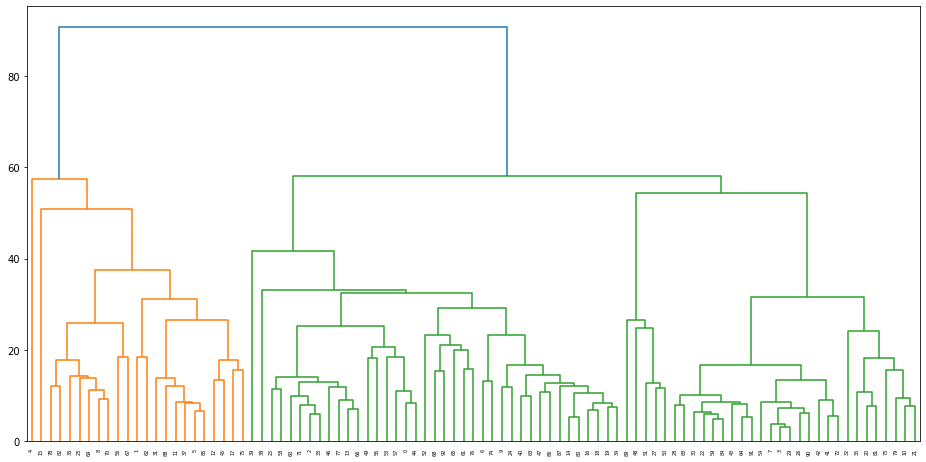

In [75]:
import scipy.cluster.hierarchy as hac

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
linkage_matrix = hac.linkage(gdp, method='ward')
dn = hac.dendrogram(linkage_matrix)
plt.show()


In [76]:
cluster_labels = hac.fcluster(linkage_matrix, 3, criterion='maxclust')
cluster_labels

array([2, 1, 2, 3, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 3, 3,
       3, 1, 2, 2, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 1, 1, 2, 2, 2, 3, 3, 3,
       2, 1, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 2,
       2, 1, 2, 1, 1, 2, 3, 3, 2, 1, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 2, 2,
       1, 3, 3, 3, 2], dtype=int32)

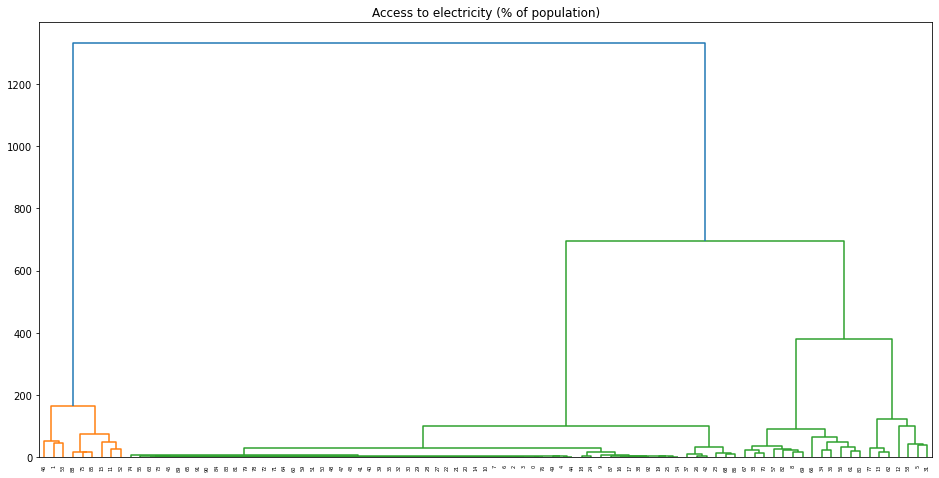

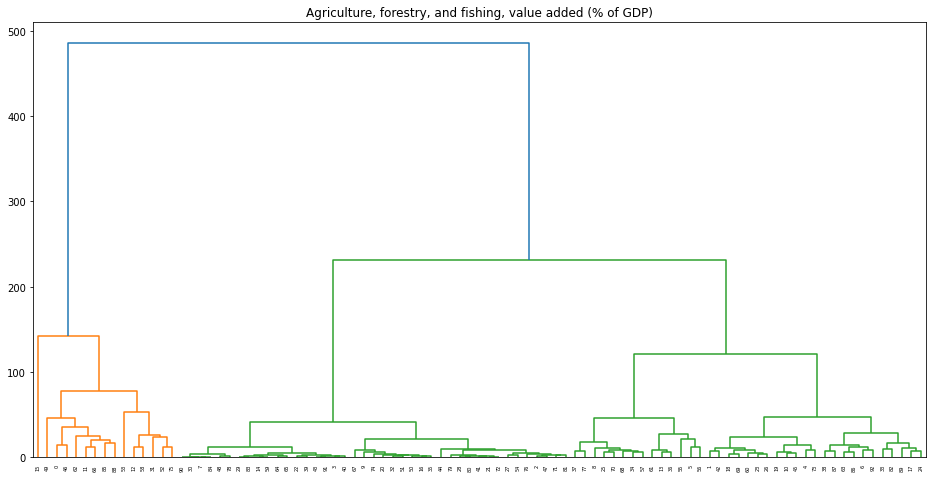

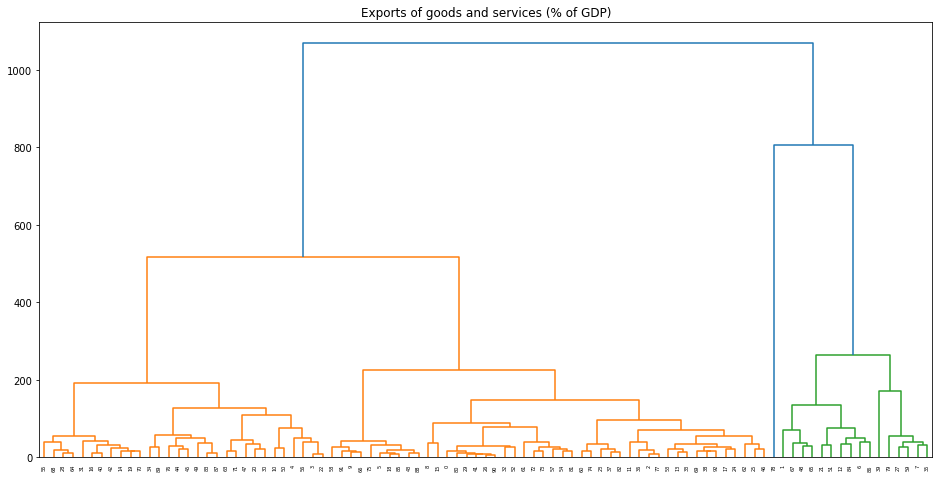

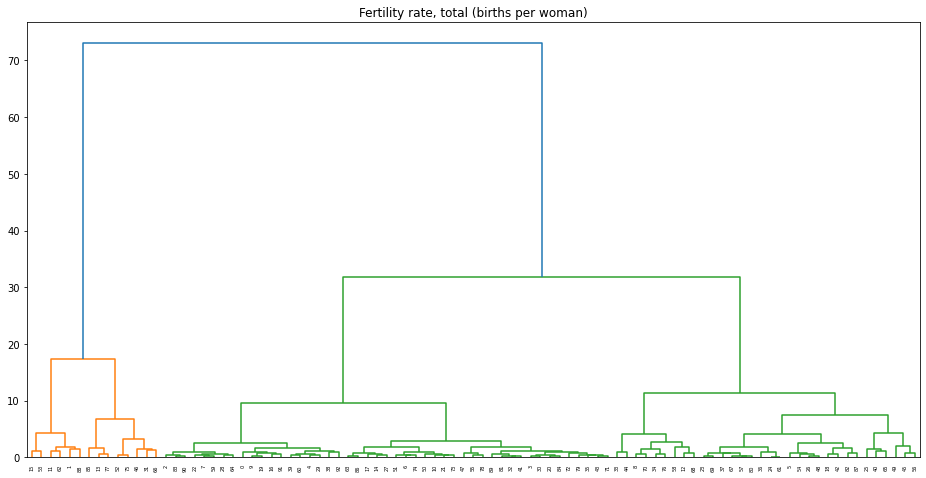

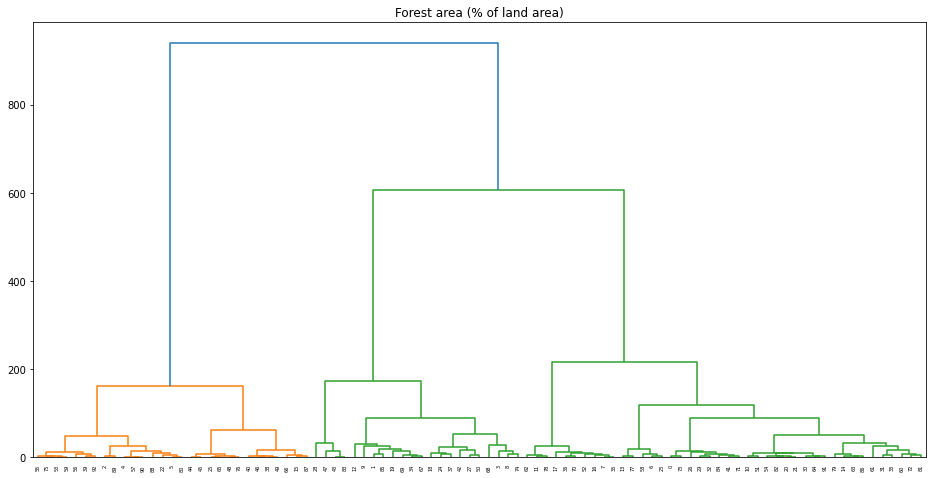

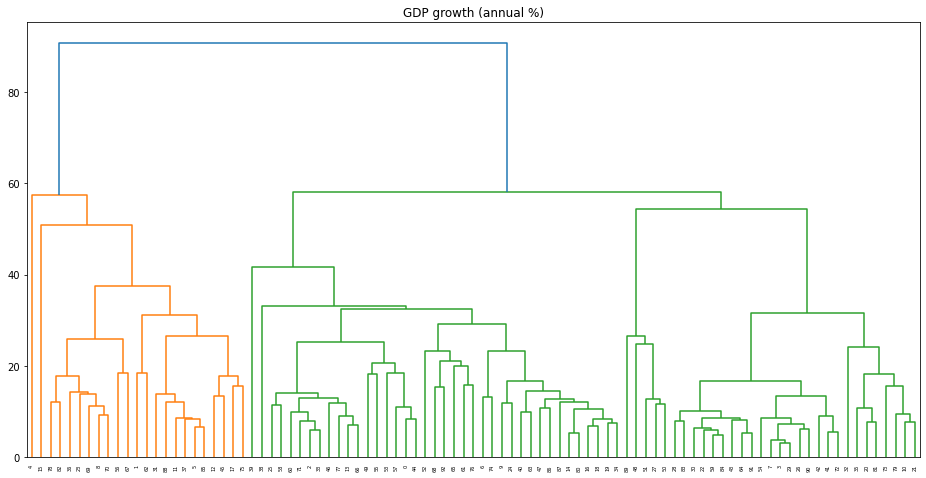

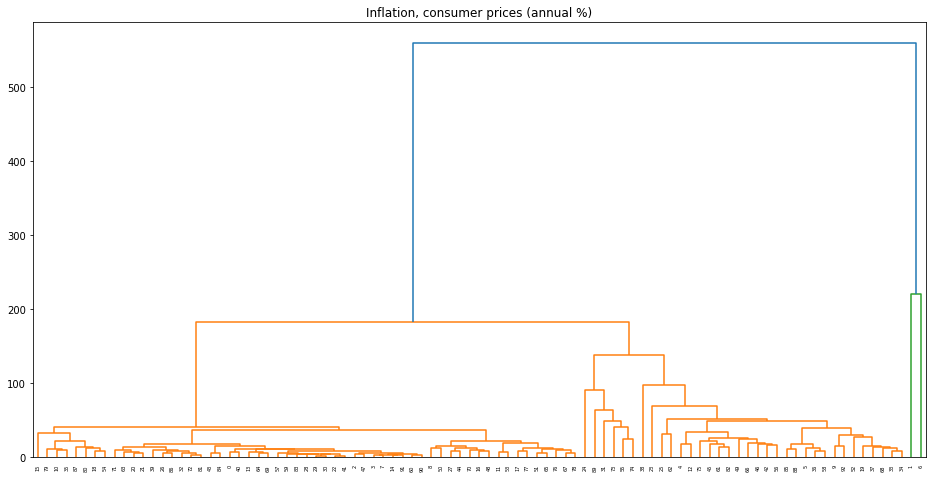

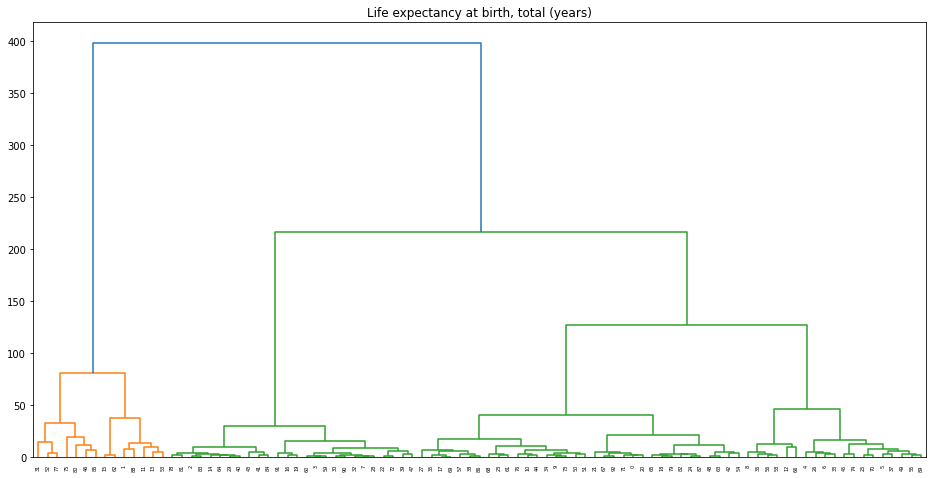

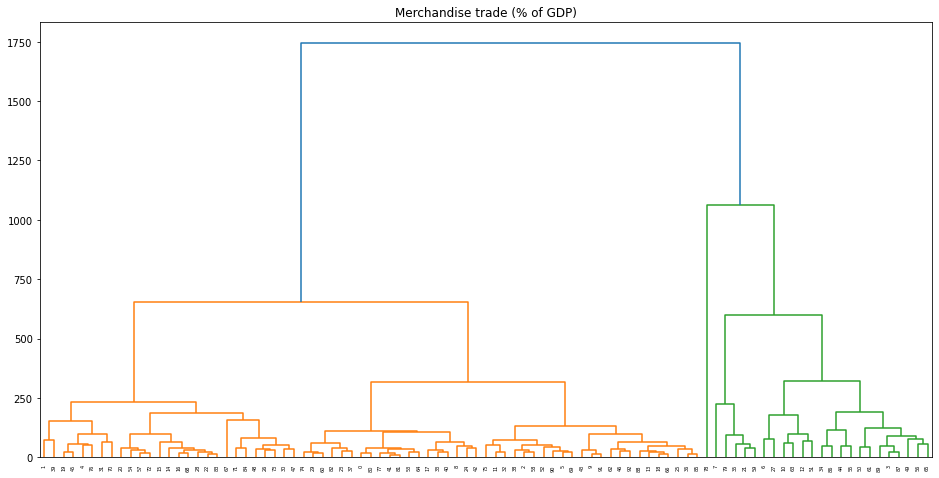

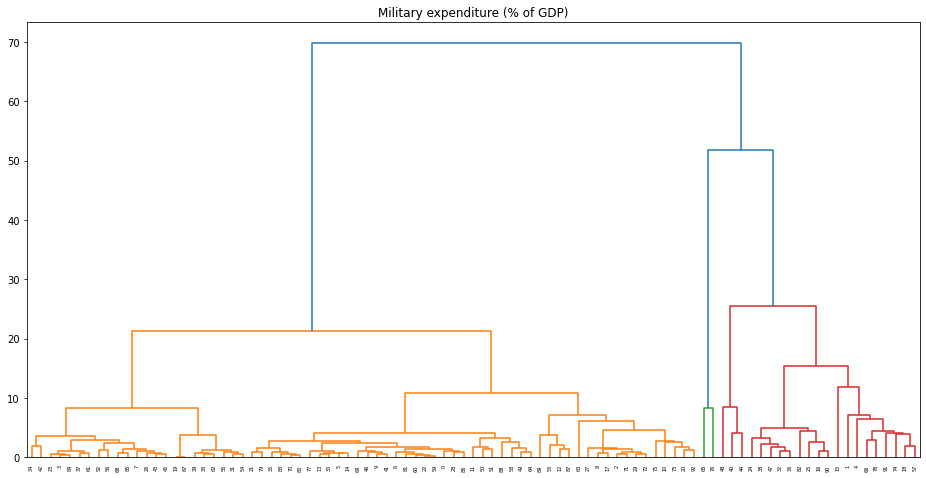

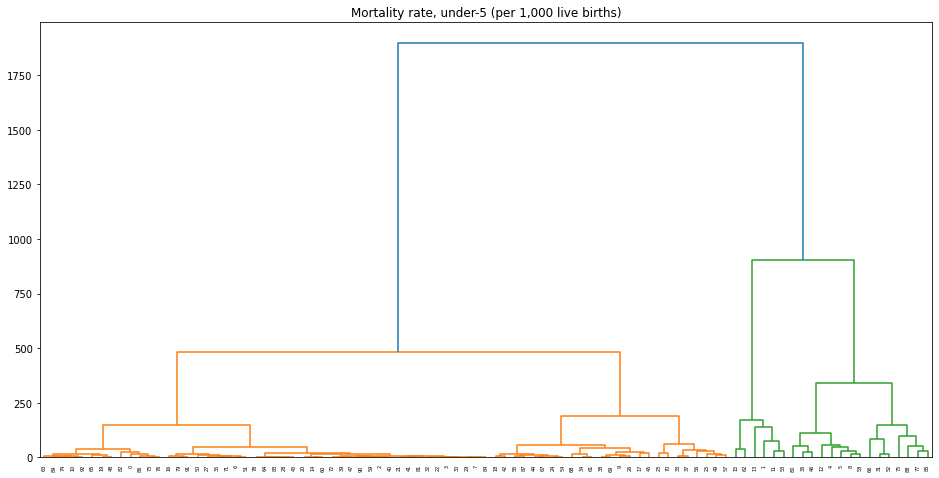

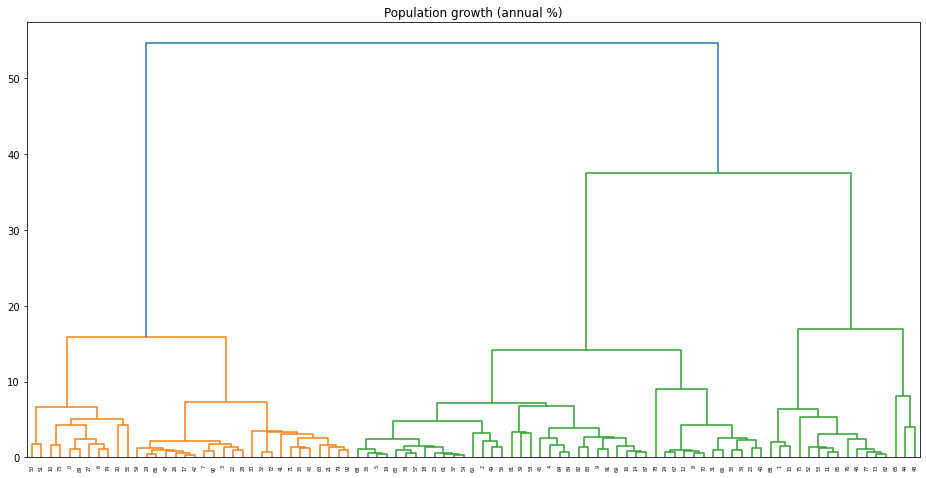

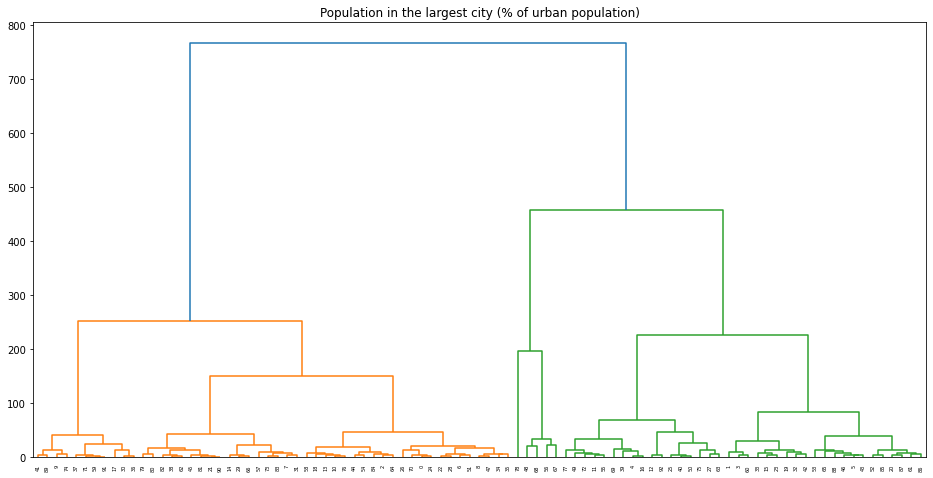

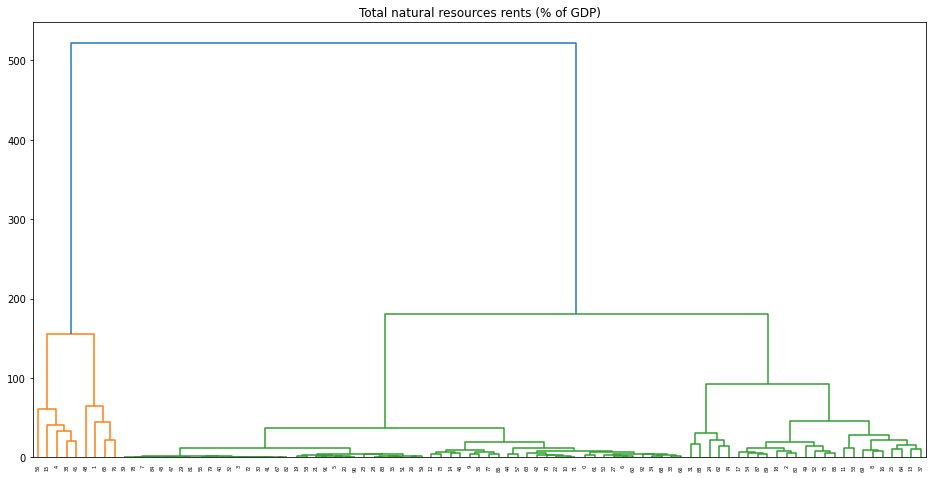

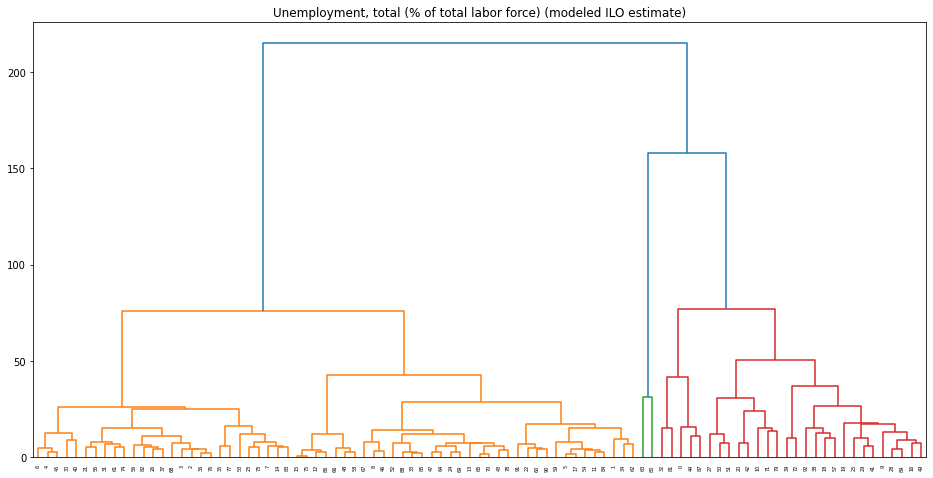

In [77]:
from sklearn.preprocessing import normalize

no_clusters = [4, 3, 4, 3, 3, 3, 3, 4, 5, 5, 4, 6, 6, 4, 5]
i = 0
series_clustered = {}

for series in ts.keys():
    current_series = pd.DataFrame(ts[series], columns=years, index=countries)
    fig = plt.figure(figsize=(16,8))
    linkage_matrix = hac.linkage(current_series, method='ward')
    dn = hac.dendrogram(linkage_matrix)
    plt.title(series)
    plt.show()
    cluster_labels = hac.fcluster(linkage_matrix, no_clusters[i], criterion='maxclust')
    current_series['Cluster'] = cluster_labels
    series_clustered[series] = current_series
    plt.show()
    i += 1


In [78]:
from IPython.display import display, HTML

for i in series_clustered:
    print(i)
    display(HTML(series_clustered[i].sort_values(by=['Cluster']).to_html()))

Access to electricity (% of population)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Kenya,15.141822,17.067640,18.985170,16.000000,22.790663,24.676426,26.553055,28.426634,30.303398,23.000000,19.200000,36.015163,37.965321,39.939590,36.000000,41.600000,53.100000,56.091431,61.436417,69.700000,69.700000,1
Rwanda,6.200000,5.579493,6.699607,7.810256,8.910265,4.800000,11.077825,12.153988,6.000000,14.322104,9.700000,10.800000,17.500000,15.200000,19.800000,22.800000,29.370000,34.100000,34.742237,37.782436,37.782436,1
Chad,3.186104,3.558882,3.923373,4.278399,3.500000,4.955507,5.279098,5.599637,5.923361,6.256507,6.400000,8.980000,7.859260,8.115848,8.405773,7.700000,9.240955,10.900000,10.121517,8.400000,8.400000,1
Mali,9.607888,10.800000,13.120466,14.863147,16.595186,18.315563,16.600000,21.735003,23.446381,24.030896,26.903639,28.661989,25.600000,32.255646,34.084621,37.600000,38.867054,34.780000,50.900000,48.021248,48.021248,1
Madagascar,13.230511,14.800000,14.074018,20.300000,14.879668,15.265511,15.642220,16.015879,16.392721,17.400000,12.300000,14.300000,18.700000,12.900000,19.023752,20.543709,22.900000,24.100000,25.515560,26.907185,26.907185,1
Tanzania,9.056112,9.996444,10.928488,11.100000,11.400000,13.663281,14.554425,15.442517,11.500000,11.200000,14.800000,14.200000,15.300000,16.400000,23.500000,26.342781,32.800000,32.418404,35.229450,37.700000,37.700000,1
Burkina Faso,9.071894,9.544128,10.008075,11.400000,10.906399,11.338578,11.761624,12.181620,12.604801,12.630000,13.100000,14.899405,15.162938,15.405174,19.200000,16.070704,16.639612,17.216557,14.400000,18.379152,18.379152,1
Uganda,7.318620,8.600000,7.800000,10.628203,11.711685,8.900000,9.000000,14.905825,15.968645,10.000000,12.100000,14.600000,20.374794,13.900000,20.400000,18.500000,26.700000,32.724560,42.700000,41.300000,41.300000,1
Angola,20.000000,20.000000,26.383869,27.465635,28.536760,29.596224,30.646555,37.500000,38.490000,33.804184,34.879726,34.600000,37.101025,38.248993,32.000000,42.000000,41.797379,43.001610,45.290000,45.670315,45.670315,1
United States,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2


Agriculture, forestry, and fishing, value added (% of GDP)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Albania,24.515412,22.716164,22.025114,21.978257,20.537486,18.845309,17.708354,17.153620,16.837054,16.794384,17.955866,18.226790,18.766802,19.565158,19.990181,19.780214,19.849994,19.022149,18.429479,18.391244,19.121963,1
Uganda,27.509107,27.850241,23.433428,24.507023,21.670353,25.074936,24.034933,22.278114,21.384599,34.057226,32.300434,28.697369,26.932672,26.043188,24.863256,23.537813,22.660323,23.458835,23.250294,22.945509,23.929034,1
Tanzania,26.208259,25.800289,25.163082,24.910725,25.696976,24.648841,23.669311,23.245488,24.765494,26.035190,25.582407,24.976864,26.550927,26.790868,25.802577,26.745886,27.444143,28.742086,27.868600,26.546415,26.737111,1
Rwanda,31.204729,31.812752,30.213450,33.053065,33.912558,33.794107,30.041987,26.083515,24.793539,25.371031,24.327935,23.850083,24.779330,24.933694,24.701568,23.993739,25.166050,26.345443,24.614969,23.543657,26.251955,1
Pakistan,25.617260,24.198275,23.062935,22.864740,23.082954,22.960419,21.607977,21.800472,22.500266,22.717330,23.281590,25.129183,23.710249,23.832116,23.744540,23.817063,23.215199,22.925868,22.855645,21.972851,23.130849,1
Nigeria,21.357241,24.475355,36.965083,33.827061,27.230454,26.089283,24.734991,24.662577,25.279751,26.748855,23.893704,22.234711,21.859959,20.758623,19.990255,20.631893,20.983110,20.846571,21.203774,21.906296,24.143306,1
Nepal,38.243897,35.247670,36.150295,35.105875,34.676357,33.824897,32.366485,31.164411,30.305716,31.322652,33.179378,30.737309,30.076057,28.622658,27.461895,26.518508,25.517875,23.699548,22.334672,21.583373,23.126774,1
Mali,32.901868,32.813606,32.714184,29.876630,30.015510,32.378482,29.790509,31.352875,32.970321,31.735706,33.016830,34.558631,38.114102,36.752816,37.456768,37.723257,37.403703,37.432440,37.612443,37.307797,36.188045,1
Madagascar,30.878717,29.851313,34.142514,32.029791,31.420505,30.762734,30.182272,28.067013,27.052572,30.465148,29.078096,29.050206,28.000612,26.493034,25.845383,25.743354,25.133454,24.550138,23.973383,22.956252,25.121295,1
Kyrgyz Republic,34.187709,34.541000,34.404796,33.622253,29.904450,28.483278,28.680291,26.880210,23.485533,18.760737,17.448256,16.565317,16.654196,14.637873,14.718663,14.060764,12.834473,12.514579,11.675286,11.665108,13.506784,1


Exports of goods and services (% of GDP)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Philippines,43.344219,41.155502,40.005680,42.305018,41.826841,41.230039,41.245459,38.014186,33.356833,30.219526,32.874830,29.105429,27.467074,26.177420,27.354504,27.208057,26.673003,29.552291,30.213605,28.382920,25.188109,1
North Macedonia,32.946840,29.198908,26.300850,27.656367,30.704166,34.807601,37.791482,44.116614,43.224469,32.805543,39.789753,47.124213,45.374253,43.396475,47.662855,48.738000,50.663842,55.145719,60.375137,62.408057,58.136323,1
Norway,45.732354,44.962303,40.373126,39.630170,41.090902,43.402545,44.644561,43.298472,45.916712,39.235679,39.759844,41.273965,40.682437,39.197174,38.996356,37.801816,35.459926,36.332996,37.971693,36.263107,32.245259,1
Ghana,48.802258,45.233016,42.616252,40.679043,39.303325,36.449217,25.192119,24.525091,25.029457,29.291866,29.476718,36.936609,40.359218,25.440783,28.231902,33.831705,31.193239,33.876874,33.454896,37.449599,32.220455,1
Germany,30.847712,31.844707,32.592579,32.811713,35.713364,38.059572,41.432908,43.322758,43.799190,38.119907,42.565473,45.057136,46.307120,45.418678,45.619263,46.920738,46.073263,47.163041,47.301046,46.624239,43.416895,1
Finland,42.031046,39.764084,39.135003,37.320839,38.615377,40.273367,43.074200,43.825907,44.900008,36.080926,38.414398,38.900393,38.808279,38.017629,36.481438,35.406959,34.810452,37.549547,38.467799,39.881677,36.206108,1
Paraguay,43.330926,40.642589,47.475077,47.144658,45.687825,47.593592,46.293085,43.374929,42.438369,38.097254,42.139842,40.238860,37.995519,38.713666,35.464412,34.765813,37.165480,38.440784,36.945230,36.199998,33.453841,1
Latvia,36.784868,38.000743,36.539574,36.046475,38.912335,42.969841,39.745240,38.261592,39.257505,42.214035,53.258379,59.779891,61.443753,60.395173,61.134653,60.252027,59.577324,61.573816,61.477965,59.836973,60.327238,1
Poland,27.188326,27.187326,28.713122,33.350450,34.235460,34.611572,37.820953,38.516288,37.814870,37.142253,39.879213,42.394223,44.251473,46.002609,47.219683,49.091228,51.924859,54.161023,55.241462,55.395847,56.184326,1
Denmark,44.847266,45.554494,45.704479,43.838409,43.928435,47.452126,50.730047,51.482535,54.175797,47.126073,50.522928,53.820149,54.630494,54.828819,54.613139,55.418174,53.425981,55.077377,56.559804,58.999335,54.881541,1


Fertility rate, total (births per woman)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Kenya,5.178,5.1120,5.0450,4.9790,4.9130,4.8430,4.7670,4.6820,4.5870,4.482,4.3690,4.2480,4.1230,3.9990,3.8790,3.7650,3.6630,3.5720,3.4920,3.4230,3.4230,1
Nigeria,6.106,6.0830,6.0600,6.0360,6.0110,5.9850,5.9580,5.9300,5.9020,5.872,5.8390,5.8020,5.7580,5.7090,5.6530,5.5920,5.5260,5.4570,5.3870,5.3170,5.3170,1
Rwanda,5.640,5.5420,5.4430,5.3420,5.2390,5.1310,5.0150,4.8930,4.7670,4.641,4.5200,4.4120,4.3220,4.2510,4.1970,4.1570,4.1230,4.0880,4.0440,3.9900,3.9900,1
Chad,7.354,7.3150,7.2680,7.2120,7.1470,7.0740,6.9920,6.9010,6.8030,6.699,6.5920,6.4820,6.3720,6.2620,6.1540,6.0490,5.9470,5.8460,5.7470,5.6490,5.6490,1
Senegal,5.448,5.3650,5.2920,5.2320,5.1850,5.1490,5.1240,5.1070,5.0940,5.081,5.0640,5.0390,5.0050,4.9600,4.9050,4.8410,4.7700,4.6970,4.6250,4.5560,4.5560,1
Cameroon,5.580,5.5240,5.4750,5.4310,5.3900,5.3500,5.3090,5.2660,5.2190,5.167,5.1110,5.0490,4.9840,4.9160,4.8470,4.7770,4.7080,4.6390,4.5720,4.5060,4.5060,1
Mali,6.897,6.8780,6.8610,6.8420,6.8210,6.7940,6.7600,6.7190,6.6700,6.612,6.5470,6.4740,6.3960,6.3150,6.2310,6.1450,6.0570,5.9680,5.8770,5.7850,5.7850,1
Pakistan,5.037,4.9040,4.7740,4.6480,4.5280,4.4160,4.3100,4.2110,4.1180,4.031,3.9510,3.8800,3.8160,3.7590,3.7080,3.6600,3.6120,3.5620,3.5100,3.4540,3.4540,1
Madagascar,5.551,5.4470,5.3420,5.2400,5.1410,5.0470,4.9560,4.8660,4.7770,4.689,4.6030,4.5200,4.4420,4.3690,4.3020,4.2410,4.1840,4.1300,4.0770,4.0260,4.0260,1
Burkina Faso,6.592,6.5310,6.4680,6.4030,6.3350,6.2650,6.1920,6.1160,6.0360,5.953,5.8670,5.7810,5.6930,5.6060,5.5210,5.4360,5.3530,5.2710,5.1890,5.1090,5.1090,1


Forest area (% of land area)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Kenya,6.959957,6.899366,6.838774,6.778183,6.717591,6.657000,6.596409,6.535817,6.475226,6.414634,6.354043,6.321035,6.288028,6.255020,6.222012,6.189004,6.240942,6.292880,6.344818,6.344818,6.344818,1
Ireland,9.150240,9.280912,9.411584,9.542256,9.672928,9.803600,9.934272,10.064944,10.195616,10.326288,10.456960,10.556510,10.656060,10.755610,10.855160,10.954710,11.066192,11.177529,11.235593,11.293657,11.351720,1
Israel,7.070240,7.074861,7.079482,7.084104,7.088725,7.093346,7.097967,7.102588,7.107209,7.111830,7.116451,7.218115,7.319778,7.421442,7.523105,7.624769,6.469501,6.469501,6.469501,6.469501,6.469501,1
Jordan,1.104941,1.104941,1.104941,1.104941,1.104941,1.104941,1.104941,1.104941,1.104941,1.098220,1.098220,1.098220,1.098220,1.098220,1.098220,1.098220,1.098220,1.098220,1.098220,1.098220,1.098220,1
Kazakhstan,1.169362,1.166593,1.163824,1.161056,1.158287,1.155518,1.152750,1.149981,1.147212,1.144443,1.141675,1.158438,1.175201,1.191964,1.208727,1.225490,1.236326,1.247161,1.257992,1.268822,1.279653,1
Kuwait,0.272166,0.280022,0.287879,0.295735,0.303591,0.311448,0.319304,0.327160,0.335017,0.342873,0.350730,0.350730,0.350730,0.350730,0.350730,0.350730,0.350730,0.350730,0.350730,0.350730,0.350730,1
Kyrgyz Republic,6.156934,6.182367,6.207800,6.233233,6.258665,6.284098,6.309531,6.334964,6.360396,6.385829,6.411262,6.434338,6.457414,6.480490,6.503566,6.526642,6.549739,6.572806,6.667883,6.762982,6.858081,1
Mali,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,10.896664,1
Moldova,10.474453,10.565998,10.657543,10.752358,10.840633,10.928854,11.020371,11.111888,11.203405,11.294922,11.400304,11.472755,11.541692,11.607056,11.679440,11.751825,11.754866,11.751292,11.752972,11.752972,11.752972,1
Mongolia,9.181428,9.176279,9.171130,9.165980,9.160831,9.155681,9.150532,9.145382,9.140233,9.135083,9.129934,9.129217,9.128500,9.127783,9.127066,9.104691,9.103979,9.103266,9.102555,9.101843,9.101130,1


GDP growth (annual %)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Philippines,4.382505,3.049232,3.716255,5.086911,6.569229,4.942505,5.316417,6.519292,4.344487,1.448323,7.334500,3.858233,6.896952,6.750531,6.347987,6.348310,7.149457,6.930988,6.341486,6.118526,-9.573030,1
Indonesia,4.920068,3.643466,4.499475,4.780369,5.030874,5.692571,5.500952,6.345022,6.013704,4.628871,6.223854,6.169784,6.030051,5.557264,5.006668,4.876322,5.033069,5.069786,5.174292,5.018160,-2.069543,1
India,3.840991,4.823966,3.803975,7.860381,7.922937,7.923431,8.060733,7.660815,3.086698,7.861889,8.497585,5.241315,5.456389,6.386106,7.410228,7.996254,8.256306,6.795383,6.532989,4.041554,-7.251755,1
Mongolia,1.146062,2.952711,4.732978,7.004635,10.625406,7.253665,8.556235,10.248016,8.900368,-1.268599,6.365162,17.290778,12.319820,11.648916,7.885225,2.379836,1.489784,5.636876,7.744881,5.602244,-4.557752,1
Ghana,3.700000,4.000000,4.500000,5.200000,5.600000,5.900004,6.399913,4.346819,9.149799,4.844487,7.899712,14.047124,9.292789,7.312525,2.856240,2.120759,3.373466,8.128895,6.200078,6.507775,0.414443,1
Nigeria,5.015935,5.917685,15.329156,7.347195,9.250558,6.438517,6.059428,6.591130,6.764473,8.036925,8.005656,5.307924,4.230061,6.671335,6.309719,2.652693,-1.616869,0.805887,1.922757,2.208429,-1.794253,1
Panama,2.715374,0.574273,2.229149,4.205496,7.522080,7.191279,8.652466,11.983986,9.855655,1.242993,5.827993,11.313626,9.778828,6.903437,5.066613,5.732690,4.953435,5.591328,3.685344,2.979715,-17.944864,1
Dominican Republic,4.661762,2.459516,4.495103,-1.345706,2.570134,9.428237,9.174355,7.415952,3.209504,0.946155,8.339651,3.133423,2.717368,4.875205,7.050464,6.927019,6.659200,4.666705,6.982528,5.052168,-6.720239,1
Peru,2.694371,0.617892,5.453529,4.165023,4.958203,6.285060,7.528899,8.518388,9.126568,1.095824,8.332459,6.327192,6.139725,5.852518,2.382157,3.252245,3.953319,2.518835,3.969157,2.203975,-11.148812,1
Rwanda,8.370918,8.484564,13.192073,2.202366,7.447680,9.377899,9.227078,7.633281,11.161243,6.248260,7.334656,7.958406,8.641500,4.719854,6.167167,8.856844,5.970744,3.976290,8.579425,9.460682,-3.355472,1


Inflation, consumer prices (annual %)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Albania,0.050018,3.107588,7.770526,0.484003,2.280019,2.366582,2.370728,2.932682,3.320871,2.266922e+00,3.626047,3.429123,2.031593,1.937621,1.625865,3.501208,-0.367317,2.060598,2.028060,1.411091,1.620887,1
Pakistan,4.366665,3.148261,3.290345,2.914135,7.444625,9.063327,7.921084,7.598684,20.286121,1.364777e+01,12.938871,11.916093,9.682352,7.692156,7.189384,2.529328,3.765119,4.085374,5.078057,10.578362,9.739993,1
Oman,-0.816667,-0.816667,-0.279579,0.231329,0.624969,1.909836,3.544986,5.830484,12.375409,3.468810e+00,3.256580,4.042189,2.947735,1.045528,1.022343,0.065290,1.109208,1.597161,0.881302,0.133795,-0.903875,1
Norway,3.085506,3.004197,1.286725,2.487826,0.454499,1.532134,2.329350,0.712589,3.753931,2.197386e+00,2.418906,1.284952,0.696864,2.120486,2.041703,2.171137,3.550000,1.875101,2.764831,2.167730,1.286585,1
North Macedonia,6.607423,5.198885,2.314598,0.855562,-0.448650,0.525516,3.213629,2.251758,8.331897,-7.396340e-01,1.509975,3.904754,3.316056,2.785001,-0.281705,-0.299920,-0.239291,1.351619,1.458313,0.766440,1.200073,1
Nigeria,6.933292,18.873646,12.876579,14.031784,14.998034,17.863493,8.225222,5.388008,11.581075,1.255496e+01,13.720202,10.840028,12.217782,8.475827,8.062486,9.009387,15.675341,16.523540,12.094732,11.396795,11.396795,1
Nicaragua,7.069914,5.986042,3.750175,5.302388,8.470211,9.599100,9.140200,11.126935,19.826203,3.687002e+00,5.455134,8.082388,7.193551,7.135468,6.035969,3.997380,3.523173,3.850672,4.947237,5.376290,3.681813,1
New Zealand,2.615234,2.625816,2.677093,1.753574,2.290249,3.037023,3.365402,2.376143,3.958949,2.115651e+00,2.302024,4.027907,1.059913,1.134423,1.227508,0.292705,0.646240,1.850788,1.598297,1.619632,1.714562,1
Netherlands,2.360522,4.155841,3.287531,2.091998,1.263647,1.688130,1.101501,1.613859,2.486502,1.189777e+00,1.275306,2.341070,2.455548,2.506899,0.976035,0.600248,0.316667,1.381459,1.703498,2.633699,1.272460,1
Nepal,2.478820,2.688304,3.029399,5.707009,2.841811,6.836333,6.920336,2.269219,9.907830,1.109482e+01,9.326504,9.227075,9.459810,9.040163,8.364155,7.868909,8.790343,3.627096,4.061163,5.568685,5.052367,1


Life expectancy at birth, total (years)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Kenya,50.921000,51.101000,51.606000,52.410000,53.475000,54.732000,56.093000,57.463000,58.760000,59.932000,60.959000,61.851000,62.659000,63.419000,64.135000,64.798000,65.393000,65.909000,66.342000,66.699000,66.699000,1
Nigeria,46.267000,46.510000,46.835000,47.242000,47.720000,48.252000,48.812000,49.373000,49.913000,50.422000,50.896000,51.346000,51.786000,52.228000,52.672000,53.112000,53.541000,53.950000,54.332000,54.687000,54.687000,1
Ghana,57.002000,57.158000,57.425000,57.785000,58.225000,58.719000,59.234000,59.741000,60.216000,60.645000,61.030000,61.381000,61.720000,62.064000,62.416000,62.772000,63.124000,63.463000,63.780000,64.074000,64.074000,1
Madagascar,58.485000,59.129000,59.717000,60.256000,60.752000,61.212000,61.650000,62.079000,62.509000,62.944000,63.388000,63.836000,64.280000,64.713000,65.133000,65.539000,65.931000,66.311000,66.681000,67.041000,67.041000,1
Senegal,57.787000,58.177000,58.675000,59.259000,59.912000,60.620000,61.365000,62.126000,62.880000,63.607000,64.284000,64.898000,65.448000,65.939000,66.370000,66.747000,67.078000,67.380000,67.665000,67.941000,67.941000,1
South Africa,56.048000,55.089000,54.310000,53.749000,53.444000,53.447000,53.795000,54.452000,55.360000,56.460000,57.669000,58.895000,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.131000,1
Chad,47.713000,47.789000,47.900000,48.057000,48.270000,48.549000,48.907000,49.335000,49.820000,50.346000,50.890000,51.424000,51.928000,52.386000,52.789000,53.137000,53.438000,53.712000,53.977000,54.239000,54.239000,1
Cameroon,50.993000,51.222000,51.536000,51.908000,52.321000,52.760000,53.215000,53.681000,54.153000,54.627000,55.101000,55.581000,56.073000,56.576000,57.083000,57.583000,58.063000,58.511000,58.921000,59.292000,59.292000,1
Burkina Faso,50.489000,50.893000,51.384000,51.956000,52.602000,53.310000,54.063000,54.841000,55.618000,56.377000,57.096000,57.761000,58.374000,58.937000,59.450000,59.919000,60.354000,60.768000,61.174000,61.577000,61.577000,1
Rwanda,48.649000,49.936000,50.987000,52.178000,53.595000,55.254000,57.083000,58.915000,60.612000,62.129000,63.433000,64.523000,65.438000,66.219000,66.884000,67.450000,67.930000,68.341000,68.700000,69.024000,69.024000,1


Merchandise trade (% of GDP)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Denmark,58.997164,58.878664,60.354858,56.828636,57.777088,60.764404,62.946085,62.987866,64.037903,55.135189,55.743674,60.327066,60.337655,60.624698,59.792863,59.826928,57.754647,58.852937,59.498732,60.019044,57.805040,1
Croatia,56.406243,59.350406,57.681475,58.298022,58.724225,59.838047,62.598322,62.694622,63.377513,49.974633,52.747146,56.990741,58.054970,58.892071,62.821563,66.774059,68.296954,72.753565,73.263545,72.839780,76.718702,1
Portugal,54.361097,52.344511,49.244130,47.892742,47.999174,52.063509,55.342344,56.043361,57.768636,47.547486,53.453218,58.216754,60.359345,61.201707,61.943977,61.190415,59.783983,63.807025,64.997683,65.253972,60.878384,1
Poland,46.902946,45.143803,48.440751,56.023291,64.577195,62.413698,68.994144,71.290368,71.074877,65.030159,70.393693,75.580549,77.114509,79.189659,81.774512,82.793457,85.335821,88.920818,90.656682,89.049775,88.537452,1
Philippines,89.763685,84.984733,90.502255,90.542019,90.295967,84.474057,79.503115,69.535669,60.288096,47.912566,52.773754,47.818063,44.841467,43.114415,43.970543,43.589389,46.085583,51.940316,54.386709,49.970639,42.717997,1
El Salvador,66.932952,64.245703,64.591575,67.064877,70.194045,68.771261,71.056739,75.453731,80.386326,63.579375,70.007892,75.296616,72.930378,73.953115,70.002527,67.419738,63.022318,65.382424,66.750318,65.097302,62.385546,1
Paraguay,50.363014,53.426358,55.598320,62.576649,62.039968,63.962746,61.179067,59.267695,62.722062,53.767286,60.717130,59.630459,56.576622,55.879054,54.002197,51.497634,50.560341,52.709008,55.633936,53.277837,52.553523,1
Finland,64.073777,58.627258,56.793990,55.865952,57.307600,60.673084,67.577642,67.067871,66.151246,49.007803,55.510209,59.367753,57.894774,56.032159,55.045364,51.291144,49.353740,54.372556,56.060944,54.815458,49.825139,1
Panama,34.443761,30.995008,29.459047,28.844789,30.226368,101.683153,103.678459,103.728477,101.582577,90.697092,94.170276,104.816828,105.043975,82.719309,74.839551,62.582598,55.484854,53.095744,53.113066,48.981534,44.876491,1
Germany,53.984998,54.408723,53.471000,54.331013,57.868288,61.423336,67.334844,69.454483,70.542047,60.227011,68.124169,72.878104,72.461442,70.358438,69.553618,70.833464,68.916579,70.920360,71.563359,70.040152,66.323803,1


Military expenditure (% of GDP)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Dominican Republic,1.030096,1.213496,1.058919,0.764145,0.687618,0.766536,0.683423,0.627619,0.699862,0.667461,0.667532,0.602928,0.653151,0.611825,0.651438,0.643675,0.634031,0.666063,0.693991,0.689583,0.750480,1
Nicaragua,0.782751,0.683525,0.865166,0.860737,0.730793,0.700404,0.551255,0.531726,0.502058,0.502751,0.505473,0.526411,0.665904,0.678614,0.685092,0.775537,0.639877,0.623899,0.622743,0.606876,0.654151,1
Panama,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
Paraguay,1.244939,1.074635,0.971237,0.825755,0.877630,0.721480,0.793455,0.741437,0.684194,0.753951,0.751146,0.845624,0.964179,0.962063,0.989089,1.068848,0.951884,0.892394,0.957366,0.968225,1.042126,1
Ghana,0.627279,0.373923,0.368354,0.428513,0.389777,0.367459,0.371043,0.509250,0.398445,0.455352,0.380678,0.592260,0.804165,0.533396,0.678999,0.526514,0.382380,0.401629,0.419660,0.441936,0.446156,1
Costa Rica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
Guatemala,0.918402,1.052063,0.762245,0.815655,0.479416,0.383914,0.431829,0.398457,0.468231,0.395326,0.441383,0.459619,0.475871,0.501954,0.456214,0.432011,0.464537,0.402561,0.390613,0.465832,0.483221,1
Honduras,0.729929,0.822611,0.809188,0.998265,0.682693,0.641478,0.692430,0.776008,0.953979,1.074911,1.074457,1.131309,1.146019,1.601318,1.548645,1.671276,1.664701,1.724405,1.607694,1.623598,1.659938,1
Mongolia,2.022481,1.781658,1.795567,1.509694,1.382730,1.017286,0.961657,1.053272,0.823307,0.629698,0.762997,0.837270,0.924306,0.822311,0.859725,0.865841,0.863495,0.765301,0.730921,0.707610,0.765310,1
Moldova,0.387282,0.402592,0.419847,0.416381,0.360979,0.400235,0.482634,0.516194,0.608536,0.457887,0.262879,0.272950,0.274080,0.281262,0.289853,0.297625,0.340330,0.319319,0.326375,0.355073,0.374838,1


Mortality rate, under-5 (per 1,000 live births)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Albania,27.2,25.8,24.4,23.0,21.5,20.0,18.5,17.1,15.8,14.5,13.3,12.1,11.2,10.4,9.9,9.6,9.4,9.4,9.5,9.7,9.8,1
Ireland,7.1,6.9,6.5,6.0,5.6,5.2,4.9,4.6,4.4,4.3,4.2,4.1,4.0,3.9,3.8,3.7,3.6,3.4,3.3,3.2,3.0,1
Israel,6.9,6.6,6.4,6.1,5.8,5.6,5.3,5.1,4.9,4.7,4.6,4.4,4.3,4.1,4.0,3.9,3.8,3.8,3.7,3.6,3.6,1
Italy,5.6,5.3,5.0,4.8,4.6,4.5,4.3,4.2,4.1,4.1,4.0,3.9,3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.0,2.9,1
Japan,4.5,4.3,4.1,4.0,3.9,3.7,3.6,3.5,3.4,3.3,3.2,3.2,3.0,2.9,2.8,2.7,2.7,2.6,2.6,2.5,2.5,1
United States,8.4,8.3,8.2,8.1,8.1,8.0,7.9,7.7,7.6,7.5,7.3,7.2,7.1,7.0,6.9,6.8,6.7,6.6,6.5,6.4,6.3,1
"Korea, Rep.",7.5,7.1,6.8,6.4,6.0,5.6,5.2,4.8,4.5,4.3,4.1,4.0,3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,1
Kuwait,12.4,12.2,12.0,11.8,11.6,11.4,11.2,11.1,10.9,10.7,10.4,10.0,9.6,9.2,8.9,8.8,8.7,8.7,8.7,8.8,8.9,1
Latvia,14.2,13.3,12.6,11.9,11.2,10.5,9.8,9.3,8.8,8.3,7.8,7.2,6.6,6.0,5.5,5.0,4.7,4.4,4.2,4.1,4.0,1
Lithuania,10.7,10.3,9.9,9.5,9.3,9.0,8.6,8.0,7.3,6.7,6.0,5.5,5.2,5.0,4.9,4.9,4.8,4.4,4.0,3.6,3.3,1


Population growth (annual %)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Albania,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.577942,1
Croatia,-0.986435,-3.847671,0.058871,0.028470,0.027904,0.128733,0.023523,-0.021853,-0.011879,-0.105028,-0.226821,-0.345264,-0.305656,-0.278509,-0.407343,-0.824099,-0.698383,-1.200610,-0.893487,-0.554147,-0.445070,1
Latvia,-0.963935,-1.291487,-1.161838,-0.966401,-1.091313,-1.080571,-0.917273,-0.816176,-1.050940,-1.651025,-2.081305,-1.820767,-1.240359,-1.071035,-0.941743,-0.818626,-0.913885,-0.886216,-0.779138,-0.695239,-0.643400,1
Lithuania,-0.703385,-0.824009,-0.802766,-0.812278,-1.122991,-1.628401,-1.596378,-1.187948,-1.028483,-1.110346,-2.096943,-2.258464,-1.341202,-1.012007,-0.859827,-0.940754,-1.270695,-1.398322,-0.954190,-0.264704,0.020147,1
Bulgaria,-0.493896,-1.990632,-2.170699,-0.792114,-0.754797,-0.752977,-0.759506,-0.735282,-0.701923,-0.644281,-0.658275,-0.641229,-0.579221,-0.559647,-0.568389,-0.638069,-0.701382,-0.730443,-0.722080,-0.703906,-0.600242,1
Romania,-0.129440,-1.395430,-1.830655,-0.721262,-0.569786,-0.617531,-0.592403,-1.477223,-1.666383,-0.833089,-0.593959,-0.491866,-0.445178,-0.371323,-0.374575,-0.470052,-0.573661,-0.578007,-0.587493,-0.526815,-0.442473,1
Moldova,-0.203365,-0.223625,-0.231582,-0.281584,-0.247453,-0.243323,-0.277938,-0.231719,-0.190372,-0.126232,-0.099863,-0.057819,-0.013114,-0.026792,-0.060956,-0.787848,-1.148202,-1.691933,-1.718541,-1.609508,-1.683107,1
Russian Federation,-0.420615,-0.424091,-0.460024,-0.453781,-0.402681,-0.381453,-0.327445,-0.171082,-0.043949,0.030108,0.044896,0.077982,0.168305,0.212951,0.217642,0.192558,0.170245,0.106871,-0.013067,-0.049569,-0.209477,1
Belarus,-0.471131,-0.512967,-0.636566,-0.699809,-0.682169,-0.683006,-0.612296,-0.458848,-0.345415,-0.245915,-0.218523,-0.234283,-0.156618,-0.038380,0.056152,0.132853,0.087721,-0.109782,-0.213824,-0.201787,-0.423475,1
Ukraine,-1.006579,-1.050921,-0.949639,-0.811376,-0.758571,-0.732801,-0.676060,-0.596871,-0.541497,-0.443841,-0.397263,-0.359600,-0.246976,-0.227691,-0.479262,-0.261250,-0.331334,-0.386345,-0.466426,-0.530994,-0.568252,1


Population in the largest city (% of urban population)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Netherlands,8.214580,8.073007,7.919660,7.789556,7.678123,7.598983,7.552995,7.513242,7.465298,7.407019,7.353517,7.312886,7.283051,7.268054,7.256542,7.240843,7.220637,7.197999,7.178400,7.155842,7.142235,1
Germany,5.491522,5.473841,5.454122,5.435439,5.418443,5.412514,5.419973,5.432408,5.448148,5.467627,5.482001,5.590788,5.599898,5.604192,5.600450,5.571646,5.545256,5.542036,5.541869,5.532074,5.524914,1
India,5.523527,5.496631,5.490878,5.515231,5.542100,5.571124,5.602800,5.636865,5.674063,5.714634,5.759564,5.808595,5.859879,5.913212,5.967835,6.023323,6.079610,6.136625,6.194530,6.241438,6.284683,1
Indonesia,9.443669,9.272097,9.106992,8.947889,8.794146,8.645865,8.502805,8.364843,8.231121,8.101136,7.974193,7.847934,7.724900,7.606027,7.492469,7.385300,7.284551,7.190282,7.101774,7.021786,6.951997,1
China,3.144938,3.143401,3.121433,3.103329,3.088659,3.076619,3.071148,3.070701,3.072777,3.077507,3.084943,3.083337,3.074973,3.068915,3.065896,3.066270,3.068828,3.072251,3.083075,3.099839,3.121992,1
Poland,7.056601,7.065711,7.078778,7.112402,7.145703,7.178097,7.211964,7.245481,7.274372,7.299286,7.350260,7.376539,7.419745,7.478679,7.539385,7.599864,7.655928,7.704573,7.751163,7.791458,7.825807,1
United States,7.985583,7.913351,7.846902,7.786463,7.721461,7.657551,7.591006,7.526160,7.462414,7.404392,7.350523,7.304043,7.257157,7.213040,7.166001,7.118753,7.072441,7.032509,7.000104,6.945737,6.903812,1
Brazil,11.988856,11.943938,11.912158,11.887809,11.871306,11.861815,11.859911,11.864946,11.876116,11.891674,11.911058,11.905988,11.902035,11.901038,11.902909,11.907624,11.915291,11.925358,11.939296,11.922240,11.909881,1
Italy,9.687908,9.658145,9.676060,9.690698,9.685843,9.696048,9.724940,9.734033,9.727928,9.741925,9.770382,9.812395,9.827480,9.747746,9.692520,9.735990,9.787440,9.837503,9.891264,10.021356,10.062396,1
Ukraine,7.893276,7.982147,8.078695,8.176824,8.268700,8.371427,8.487862,8.599284,8.707527,8.796916,8.882143,8.964963,9.038479,9.110678,9.206689,9.283472,9.367564,9.457589,9.554216,9.642281,9.726731,1


Total natural resources rents (% of GDP)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
"Iran, Islamic Rep.",32.624116,23.733489,22.064368,23.279558,26.661312,34.484679,34.746387,28.375542,33.209614,19.917579,23.104216,28.205807,23.439333,27.581805,27.499122,15.816455,13.667290,18.174421,23.646412,23.646412,23.646412,1
Azerbaijan,33.925883,27.426686,25.763396,26.092722,28.858054,37.686165,42.037911,39.217761,41.217480,28.448346,32.188806,35.223160,31.417091,26.985551,23.033232,14.568596,15.365429,21.080096,29.252374,25.460838,25.460838,1
Kazakhstan,25.797333,20.120707,22.395794,22.346564,27.673347,29.797120,29.179648,26.573523,32.008836,20.875681,24.211937,27.192306,23.391183,19.204050,17.613583,9.552693,11.500623,15.674516,21.784482,17.624529,17.624529,1
Chad,10.599824,8.365048,8.651861,15.730562,37.409942,38.650624,37.587396,34.183484,36.229010,20.279675,24.819009,29.500457,26.588727,22.651994,21.618409,13.193201,13.246665,21.483316,24.620187,21.122863,21.122863,1
Mongolia,5.208003,5.685732,4.433507,4.551278,14.928066,16.711015,28.362518,27.447524,30.782559,23.830906,35.975242,42.257571,22.390929,18.763802,16.139408,9.789107,10.120978,17.337829,20.954655,16.430876,16.430876,1
Oman,46.702419,39.440712,36.240245,36.174195,39.658843,46.785859,45.233774,41.685383,40.724289,33.170239,39.659028,49.940715,46.522977,44.982967,39.472480,23.973576,19.765985,23.380446,28.992311,26.677186,26.677186,2
Angola,55.450073,38.434427,27.693387,24.048765,40.193700,45.827185,43.490045,46.279012,55.852170,30.732499,40.142464,41.153694,36.228516,30.816025,23.671037,10.801556,10.857114,16.452411,27.428220,26.194267,26.194267,2
Kuwait,51.815708,44.208895,38.900932,40.833546,48.362446,56.007671,53.330029,49.272427,54.219438,40.247200,49.337496,58.982812,54.850211,52.961819,50.943584,37.055230,32.104890,36.603711,44.663472,42.656321,42.656321,2
Saudi Arabia,41.810779,33.887168,31.768772,37.400582,42.804257,52.326204,52.262412,48.543485,55.523309,35.463070,42.151300,51.168716,49.007075,45.754825,40.947607,24.107069,19.878961,23.930526,29.662510,24.806264,24.806264,2
New Zealand,1.978138,1.748890,1.471329,1.078682,0.943630,1.114838,1.231585,1.383422,2.429995,1.830996,1.983353,2.036453,1.712699,1.482771,1.329308,1.290506,1.172153,1.534231,1.700829,1.567835,1.567835,3


Unemployment, total (% of total labor force) (modeled ILO estimate)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Cluster
Russian Federation,10.580000,8.980000,7.880000,8.210000,7.760000,7.120000,7.060000,6.000000,6.210000,8.300000,7.370000,6.540000,5.440000,5.460000,5.160000,5.570000,5.560000,5.210000,4.850000,4.500000,5.590000,1
El Salvador,6.960000,6.960000,5.730000,6.260000,6.050000,7.220000,6.570000,6.410000,5.880000,7.330000,4.890000,4.300000,3.840000,3.690000,4.150000,4.000000,4.420000,4.390000,4.010000,4.170000,6.248000,1
Sweden,5.470000,4.730000,4.970000,5.550000,6.690000,7.490000,7.070000,6.160000,6.230000,8.350000,8.610000,7.800000,7.980000,8.050000,7.950000,7.430000,6.990000,6.720000,6.360000,6.830000,8.290000,1
Germany,7.920000,7.770000,8.480000,9.780000,10.730000,11.170000,10.250000,8.660000,7.520000,7.740000,6.970000,5.820000,5.380000,5.230000,4.980000,4.620000,4.120000,3.750000,3.380000,3.140000,3.810000,1
Dominican Republic,6.430000,7.260000,6.780000,6.940000,6.300000,6.590000,5.650000,5.160000,4.760000,5.470000,5.210000,6.090000,6.720000,7.350000,6.720000,7.610000,7.280000,5.830000,5.860000,6.360000,6.130000,1
Ghana,10.460000,9.501000,8.535000,7.563000,6.593000,5.619000,4.640000,4.843000,4.992000,5.217000,5.380000,5.596000,5.911000,6.203000,6.524000,6.810000,5.527000,4.220000,4.276000,4.316000,4.651000,1
Czech Republic,8.760000,7.990000,7.020000,7.540000,8.210000,7.930000,7.150000,5.320000,4.390000,6.660000,7.280000,6.710000,6.980000,6.950000,6.110000,5.050000,3.950000,2.890000,2.240000,2.010000,2.550000,1
Israel,11.100000,11.810000,12.890000,13.510000,13.030000,11.340000,10.710000,9.380000,7.700000,9.530000,8.480000,7.140000,6.860000,6.210000,5.890000,5.250000,4.800000,4.220000,4.000000,3.800000,4.330000,1
Paraguay,7.610000,6.210000,9.390000,6.810000,6.510000,4.820000,5.280000,4.710000,4.420000,5.460000,4.570000,4.670000,4.090000,4.380000,5.030000,4.560000,5.250000,4.610000,6.220000,6.590000,7.550000,1
Kazakhstan,12.750000,10.430000,9.330000,8.780000,8.400000,8.130000,7.790000,7.260000,6.630000,6.550000,5.770000,5.390000,5.290000,5.200000,5.060000,4.930000,4.960000,4.900000,4.850000,4.800000,4.890000,1
